# 2.2. Ejercicio

En este ejercicio vamos a crear una Red Neuronal Convolucional para clasificar la base de datos llamada **Fashion MNIST**.

En primer lugar descargaremos la base de datos y la prepararemos para el entrenamiento. Para practicar vamos a limitar el número de muestras de entrenamiento a 50, comprobaremos el resultado obtenido e intentaremos solucionarlo de distintas formas.

Por último entrenaremos usando todos los datos originales de la base de datos y crearemos un formulario para probar cómo funciona la red al clasificar una imagen externa, subida por nosotros.

Sigue los pasos indicados y completa las líneas marcadas con "**TODO**".

## Paso 1. Descargar la base de datos

En primer lugar descargamos la base de datos y mostramos algunas imágenes escogidas aleatoriamente con su etiqueta o clase correspondiente.

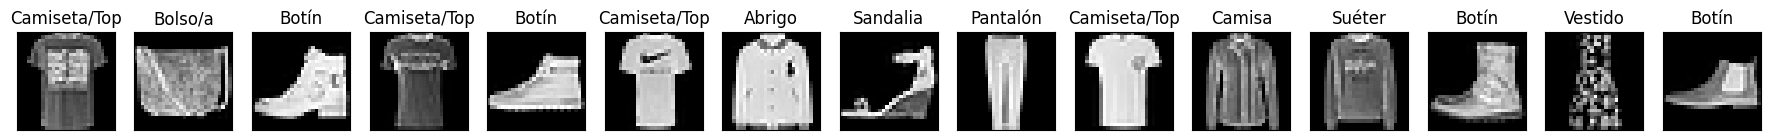

Datos para entrenamiento:
 - x_train: (60000, 28, 28)
 - y_train: (60000,)
Datos para evaluación:
 - x_test: (10000, 28, 28)
 - y_test: (10000,)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf    # TODO - importa la librería de Tensorflow como "tf"
from tensorflow.keras.datasets import fashion_mnist


tf.random.set_seed(2)  # Fijamos la semilla de TF
np.random.seed(2)  # Fijamos la semilla


# Descargamos la base de datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

labels = ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso/a', 'Botín']


# Mostramos algunas imágenes
n = 15
index = np.random.randint(len(x_train), size=n)
plt.figure(figsize=(n*1.5, 1.5))
for i in np.arange(n):
    ax = plt.subplot(1,n,i+1)
    ax.set_title( labels[ y_train[ index[i] ] ] )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_train[index[i]], cmap='gray')
plt.show()


# Mostramos la forma de los datos
print('Datos para entrenamiento:')
print(' - x_train: {}'.format( str(x_train.shape)) ) # TODO: Muestra la forma de la variable x_train
print(' - y_train: {}'.format( str(y_train.shape)) ) # TODO: Muestra la forma de la variable y_train
print('Datos para evaluación:')
print(' - x_test: {}'.format( str(x_test.shape)) )   # TODO: Muestra la forma de la variable x_test
print(' - y_test: {}'.format( str(y_test.shape)) )   # TODO: Muestra la forma de la variable y_test

## Paso 2. Preparar los datos para el entrenamiento

En este paso vamos a preparar los datos para el entrenamiento. Sobre las características (x_train y x_test) tendremos que realizar una redimensión para añadir el canal de gris, transformar los datos a decimal y normalizarlos entre 0 y 1. Y las etiquetas las tendremos que transformar a modo categórico.

In [5]:
# ---------------------
def prepare_data(x):
  x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)    # Redimensionamos para añadir el canal
  x = x.astype(np.float32)      # TODO: Transforma la variable "x" a decimal
  x = x / 255                   # TODO: Normaliza la variable "x" entre 0 y 1
  return x

x_train = prepare_data(x_train)
x_test  = prepare_data(x_test)


# Transformamos las etiquetas a categórico (one-hot)
NUM_LABELS = 10
y_train = tf.keras.utils.to_categorical(y_train, NUM_LABELS)   # TODO: Transforma la variable "y_train" a categórica
y_test =  tf.keras.utils.to_categorical(y_test, NUM_LABELS)   # TODO: Transforma la variable "y_test" a categórica


# Para los primeros ejemplos vamos a limitar el número de imágenes de
# entrenamiento a 50. Además nos guardamos un backup con todas las imágenes.
x_train_backup = x_train.copy()
y_train_backup = y_train.copy()
x_train = x_train[:50]
y_train = y_train[:50]


# Mostramos (de nuevo) la forma de los datos
print('Datos para entrenamiento:')
print(' - x_train: {}'.format( str(x_train.shape)) ) # TODO: Muestra la forma de la variable x_train
print(' - y_train: {}'.format( str(y_train.shape)) ) # TODO: Muestra la forma de la variable y_train
print('Datos para evaluación:')
print(' - x_test: {}'.format( str(x_test.shape)) )   # TODO: Muestra la forma de la variable x_test
print(' - y_test: {}'.format( str(y_test.shape)) )   # TODO: Muestra la forma de la variable y_test

Datos para entrenamiento:
 - x_train: (50, 28, 28, 1)
 - y_train: (50, 10)
Datos para evaluación:
 - x_test: (10000, 28, 28, 1)
 - y_test: (10000, 10)


## Paso 3. Construimos la red y la entrenamos

En este tercer paso vamos a construir una red CNN básica y entrenarla. La red estará formada solamente por una capa convolucional (con 1 filtro de tamaño 3x3) seguida por una operación de Max Pooling (de tamaño 2x2), y por último una capa Fully Connected para la salida con 10 neuronas con activación tipo SoftMax.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model1 = Sequential() # TODO: Define un modelo secuencial

# Capa convolucional con 1 filtro de tamaño 3x3 seguida de un MaxPooling de 2x2
model1.add(Conv2D(1, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model1.add( MaxPooling2D(pool_size=(2, 2)) )  # TODO: Añade la capa de MaxPooling2D con la configuración indicada

# Capa Fully Connected
model1.add(Flatten())
model1.add( Dense(NUM_LABELS, activation='softmax') )  # TODO: Añade una capa densa con "NUM_LABELS" neuronas de salida y función de activación SoftMax

print( model1.summary() )       # TODO: Imprime el resumen con la configuración de la red


# Compilamos la red
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# Entrenamos durante 10 épocas con un batch de 32
history = model1.fit(x_train, y_train,
                     validation_data=(x_test, y_test),
                     batch_size= 32,   # TODO - Asigna un tamaño de batch de 32
                     epochs= 10,       # TODO - Asigna 10 épocas
                     verbose=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 1)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 169)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1700      
                                                                 
Total params: 1,710
Trainable params: 1,710
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
2/2 [==============================] - 13s 2s/step - loss: 2.3117 - accuracy: 0.1600 - val_loss: 2.290

A continuación vamos a mostrar las curvas de aprendizaje y a evaluar el modelo entrenado con los datos de test.

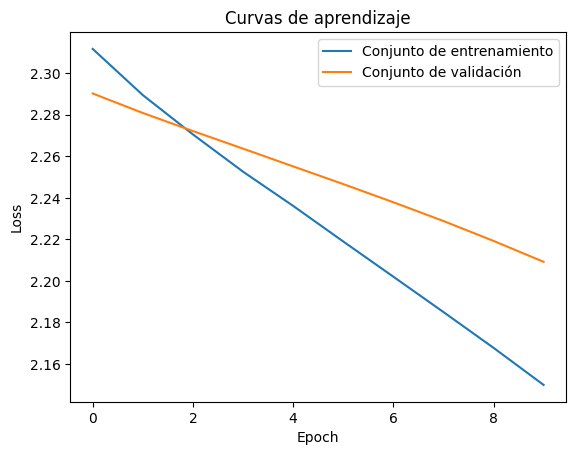

Resultado en el test set:
Test loss: 2.2092
Test accuracy: 22.45%


In [9]:
# -----------------------------
def plot_learning_curves(hist):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Curvas de aprendizaje')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Conjunto de entrenamiento', 'Conjunto de validación'], loc='upper right')
  plt.show()

plot_learning_curves(history)

# Evaluamos usando el test set
score =  model1.evaluate(x_test, y_test, verbose=0)   # TODO: Llama a la función de evaluación del modelo entrenado con los datos x_test y y_test

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

Como se puede ver en los resultados anteriores, parece que el modelo está haciendo overfitting: la varianza, diferencia entre el error de entrenamiento y el de validación, es muy alta. Esto también se puede ver en el accuracy obtenido, 46% para el conjunto de entrenamiento y 30% para la validación.

## Paso 4. Construimos un nuevo modelo de red

Como el resultado obtenido con el modelo anterior no es muy bueno y además parece que está haciendo overfitting, vamos a crear otro modelo de red con más filtros por cada capa convolucional, y además le añadiremos un 20% de dropout.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 32)         

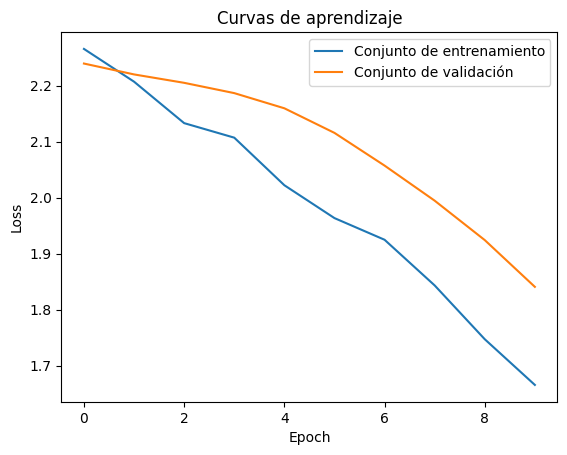

Resultado en el test set:
Test loss: 1.8408
Test accuracy: 44.41%


In [15]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Capa convolucional con 64 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model2.add(Conv2D( 64 , (3, 3), activation='relu', input_shape=x_train.shape[1:]))   # TODO: Establece el número de filtros a 32
model2.add( MaxPooling2D(pool_size=(2, 2)))   # TODO: Añade la capa de MaxPooling2D con la configuración indicada
model2.add( Dropout(0.2) )   # TODO: Añade un Dropout de 0.2

# Capa convolucional con 32 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model2.add(Conv2D( 32 , (3, 3), activation='relu'))   # TODO: Establece el número de filtros a 32
model2.add( MaxPooling2D(pool_size=(2, 2)))   # TODO: Añade la capa de MaxPooling2D con la configuración indicada
model2.add( Dropout(0.2) )   # TODO: Añade un Dropout de 0.2

# Capa Fully Connected
model2.add( Flatten() )  # TODO: Añade una capa tipo Flatten
model2.add(Dense(NUM_LABELS, activation='softmax'))

print(model2.summary())

# Compilamos y entrenamos
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

history = model2.fit(x_train, y_train, validation_data=(x_test, y_test),
                     batch_size=  32,  # TODO: Establece el tamaño de batch a 32
                     epochs=  10,      # TODO: Establece el número de épocas a 10
                     verbose=1)


plot_learning_curves(history)

# Evaluamos usando el test set
score = model2.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))


Con esta nueva topología de red hemos conseguido mejorar el resultado, además la varianza obtenida es mucho más baja (ya no está haciendo overfitting). Sin embargo, el error de entrenamiento (el bias) sigue siendo bastante alto.

Para solucionar esto podríamos aplicar aumentado de datos (este ejercicio se deja como opcional) o añadir más datos al conjunto de entrenamiento. Como inicialmente habíamos limitado los datos vamos a usar la segunda estrategia.

## Paso 5. Entrenar con todas las imágenes

En este paso vamos a restaurar todas las imágenes de entrenamiento que nos habíamos guardado al principio en las variables `x_train_backup` y `y_train_backup`, y volveremos a lanzar el entrenamiento para el segundo modelo de red que hemos creado.

Datos para entrenamiento:
 - x_train: (60000, 28, 28, 1)
 - y_train: (60000, 10)
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3399 - accuracy: 0.8775 - val_loss: 0.3223 - val_accuracy: 0.8869
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3142 - accuracy: 0.8863 - val_loss: 0.3050 - val_accuracy: 0.8915
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2969 - accuracy: 0.8922 - val_loss: 0.3070 - val_accuracy: 0.8885
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2855 - accuracy: 0.8954 - val_loss: 0.2963 - val_accuracy: 0.8944
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2765 - accuracy: 0.8996 - val_loss: 0.2850 - val_accuracy: 0.8976
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2685 - accuracy: 0.9015 - val_loss: 0.2963 - val_accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] 

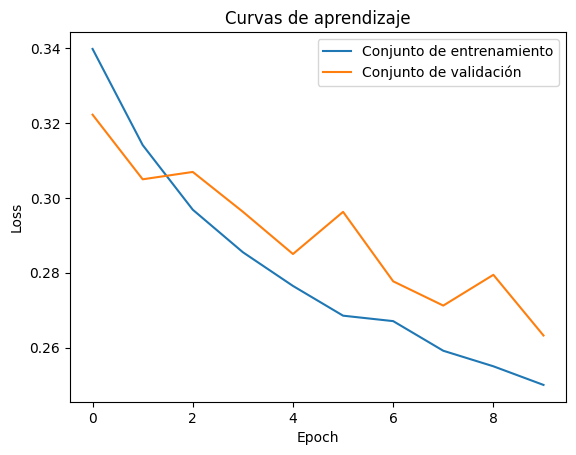

Resultado en el test set:
Test loss: 0.2632
Test accuracy: 90.52%


In [18]:
# Restauramos todas las imágenes de entrenamiento
x_train = x_train_backup
y_train = y_train_backup

print('Datos para entrenamiento:')
print(' - x_train: {}'.format( x_train.shape ))
print(' - y_train: {}'.format( y_train.shape ))


# Iniciamos el entrenamiento
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test),
                     batch_size=  32,  # TODO: Establece el tamaño de batch a 32
                     epochs=  10,      # TODO: Establece el número de épocas a 10
                     verbose=1)

plot_learning_curves( history )   # TODO: Pasa como parámetro a la función la variable que almacena las curvas de aprendizaje


# Evaluamos usando el test set
score = model2.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

Como se puede ver, al entrenar con muchos más datos el resultado obtenido ha mejorado hasta alcanzar el 90% de acierto.

## Paso 6. Predicción con imágenes externas

Por último vamos a probar el funcionamiento del segundo modelo entrenado para la predicción de la clase de imágenes externas, subidas por nosotros mediante un formulario.

Saving camiseta to camiseta


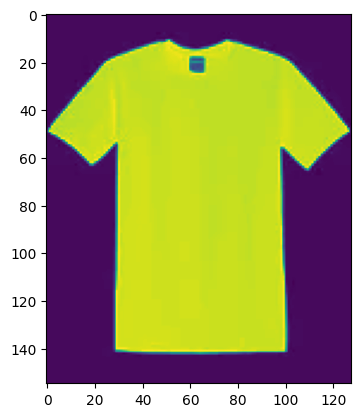

1/1 [==============================] - 0s 19ms/step
Predicción:  Camiseta/Top


In [21]:
from google.colab import files
from io import BytesIO
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
  img = cv2.imread(fn, cv2.IMREAD_COLOR)
  img = 255 - cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  plt.imshow(img)
  plt.grid(False)
  plt.show()

  # Escalamos la imagen
  img = cv2.resize(img, (28, 28))

  # Normalizamos los datos
  img = prepare_data(np.array([img]))

  # Ejecutamos la red
  prediction = model2.predict(img)   # TODO: Llama a la función para calcular la predicción a partir de la variable de entrada "img"

  print('Predicción: ', labels[np.argmax(prediction)])

